In [1]:
import numpy  as np
import matplotlib as rc
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor #RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#from xgboost import XGBClassifier
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.


warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook. 

# 데이터 가져오기
df = pd.read_csv(r"stats.csv", encoding='cp1252')

In [2]:
#데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

In [3]:
#결측치 확인
df.isnull().sum()

team                    0 
wins                    0 
losses                  0 
goals                   0 
total_yel_card          0 
total_red_card          0 
total_scoring_att       0 
ontarget_scoring_att    0 
hit_woodwork            0 
att_hd_goal             0 
att_pen_goal            0 
att_freekick_goal       0 
att_ibox_goal           0 
att_obox_goal           0 
goal_fastbreak          0 
total_offside           0 
clean_sheet             0 
goals_conceded          0 
saves                   20
outfielder_block        0 
interception            0 
total_tackle            0 
last_man_tackle         0 
total_clearance         0 
head_clearance          20
own_goals               0 
penalty_conceded        0 
pen_goals_conceded      0 
total_pass              0 
total_through_ball      20
total_long_balls        0 
backward_pass           80
total_cross             0 
corner_taken            0 
touches                 0 
big_chance_missed       80
clearance_off_line      0 
d

### 시각화 및 전처리

In [4]:
#결측치 제거
df.dropna(axis=1, inplace=True)

In [5]:
df['rank']= df.groupby('season')['goals'].rank(method='min',ascending=False)

In [6]:
df = df.sort_values(by=['season','team'])

In [7]:
#12년 연속 참여 7팀 선정(37팀 중)
df = df.loc[(df['team']== 'Manchester City')|(df['team']== 'Everton')
            |(df['team']== 'Tottenham Hotspur')|(df['team']== 'Arsenal')
            |(df['team']== 'Chelsea')|(df['team']== 'Liverpool')
            |(df['team']== 'Manchester United')]

In [8]:
df = df.reset_index(drop='True')

In [9]:
df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,season,rank
0,Arsenal,19.00,8.00,63.00,59.00,3.00,638.00,226.00,19.00,10.00,10.00,3.00,53.00,10.00,7.00,111.00,12.00,35.00,73.00,214.00,998.00,1.00,1202.00,1.00,3.00,3.00,18458.00,2045.00,873.00,278.00,25592.00,1.00,0.00,88.00,27.00,2006-2007,3.00
1,Chelsea,24.00,3.00,64.00,62.00,4.00,636.00,216.00,14.00,16.00,3.00,6.00,41.00,23.00,6.00,127.00,22.00,24.00,74.00,292.00,982.00,0.00,1206.00,1.00,3.00,2.00,16759.00,2270.00,897.00,231.00,24010.00,2.00,1.00,74.00,22.00,2006-2007,2.00
2,Everton,15.00,10.00,52.00,65.00,2.00,465.00,153.00,9.00,9.00,8.00,2.00,44.00,8.00,3.00,81.00,14.00,36.00,120.00,303.00,860.00,1.00,1386.00,3.00,4.00,2.00,12274.00,2288.00,867.00,208.00,19250.00,2.00,1.00,83.00,15.00,2006-2007,6.00
3,Liverpool,20.00,10.00,57.00,44.00,0.00,668.00,214.00,15.00,8.00,6.00,1.00,46.00,11.00,3.00,120.00,20.00,27.00,65.00,246.00,969.00,2.00,1115.00,0.00,1.00,1.00,17154.00,2800.00,1107.00,282.00,24150.00,1.00,0.00,51.00,27.00,2006-2007,4.00
4,Manchester City,11.00,18.00,29.00,59.00,4.00,454.00,147.00,5.00,3.00,2.00,0.00,23.00,6.00,5.00,142.00,14.00,44.00,110.00,234.00,986.00,1.00,1213.00,2.00,3.00,2.00,12765.00,2059.00,811.00,198.00,19378.00,4.00,1.00,64.00,17.00,2006-2007,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Everton,13.00,15.00,44.00,51.00,3.00,359.00,121.00,7.00,8.00,5.00,0.00,36.00,8.00,2.00,82.00,10.00,58.00,160.00,514.00,644.00,0.00,1229.00,1.00,5.00,3.00,14749.00,2726.00,629.00,150.00,22298.00,6.00,1.00,28.00,23.00,2017-2018,11.00
80,Liverpool,21.00,5.00,84.00,44.00,1.00,638.00,233.00,16.00,12.00,2.00,2.00,75.00,9.00,9.00,70.00,17.00,38.00,71.00,379.00,637.00,4.00,736.00,0.00,6.00,4.00,22962.00,2370.00,764.00,230.00,30324.00,2.00,2.00,25.00,20.00,2017-2018,2.00
81,Manchester City,32.00,2.00,106.00,59.00,2.00,665.00,265.00,23.00,12.00,6.00,1.00,93.00,13.00,4.00,67.00,18.00,27.00,53.00,346.00,563.00,3.00,588.00,2.00,2.00,0.00,28241.00,1775.00,691.00,284.00,35130.00,4.00,2.00,21.00,15.00,2017-2018,1.00
82,Manchester United,25.00,7.00,68.00,64.00,1.00,512.00,178.00,16.00,12.00,1.00,2.00,56.00,13.00,4.00,88.00,19.00,28.00,112.00,481.00,564.00,0.00,853.00,2.00,1.00,1.00,20064.00,2308.00,753.00,220.00,27525.00,4.00,0.00,20.00,6.00,2017-2018,5.00


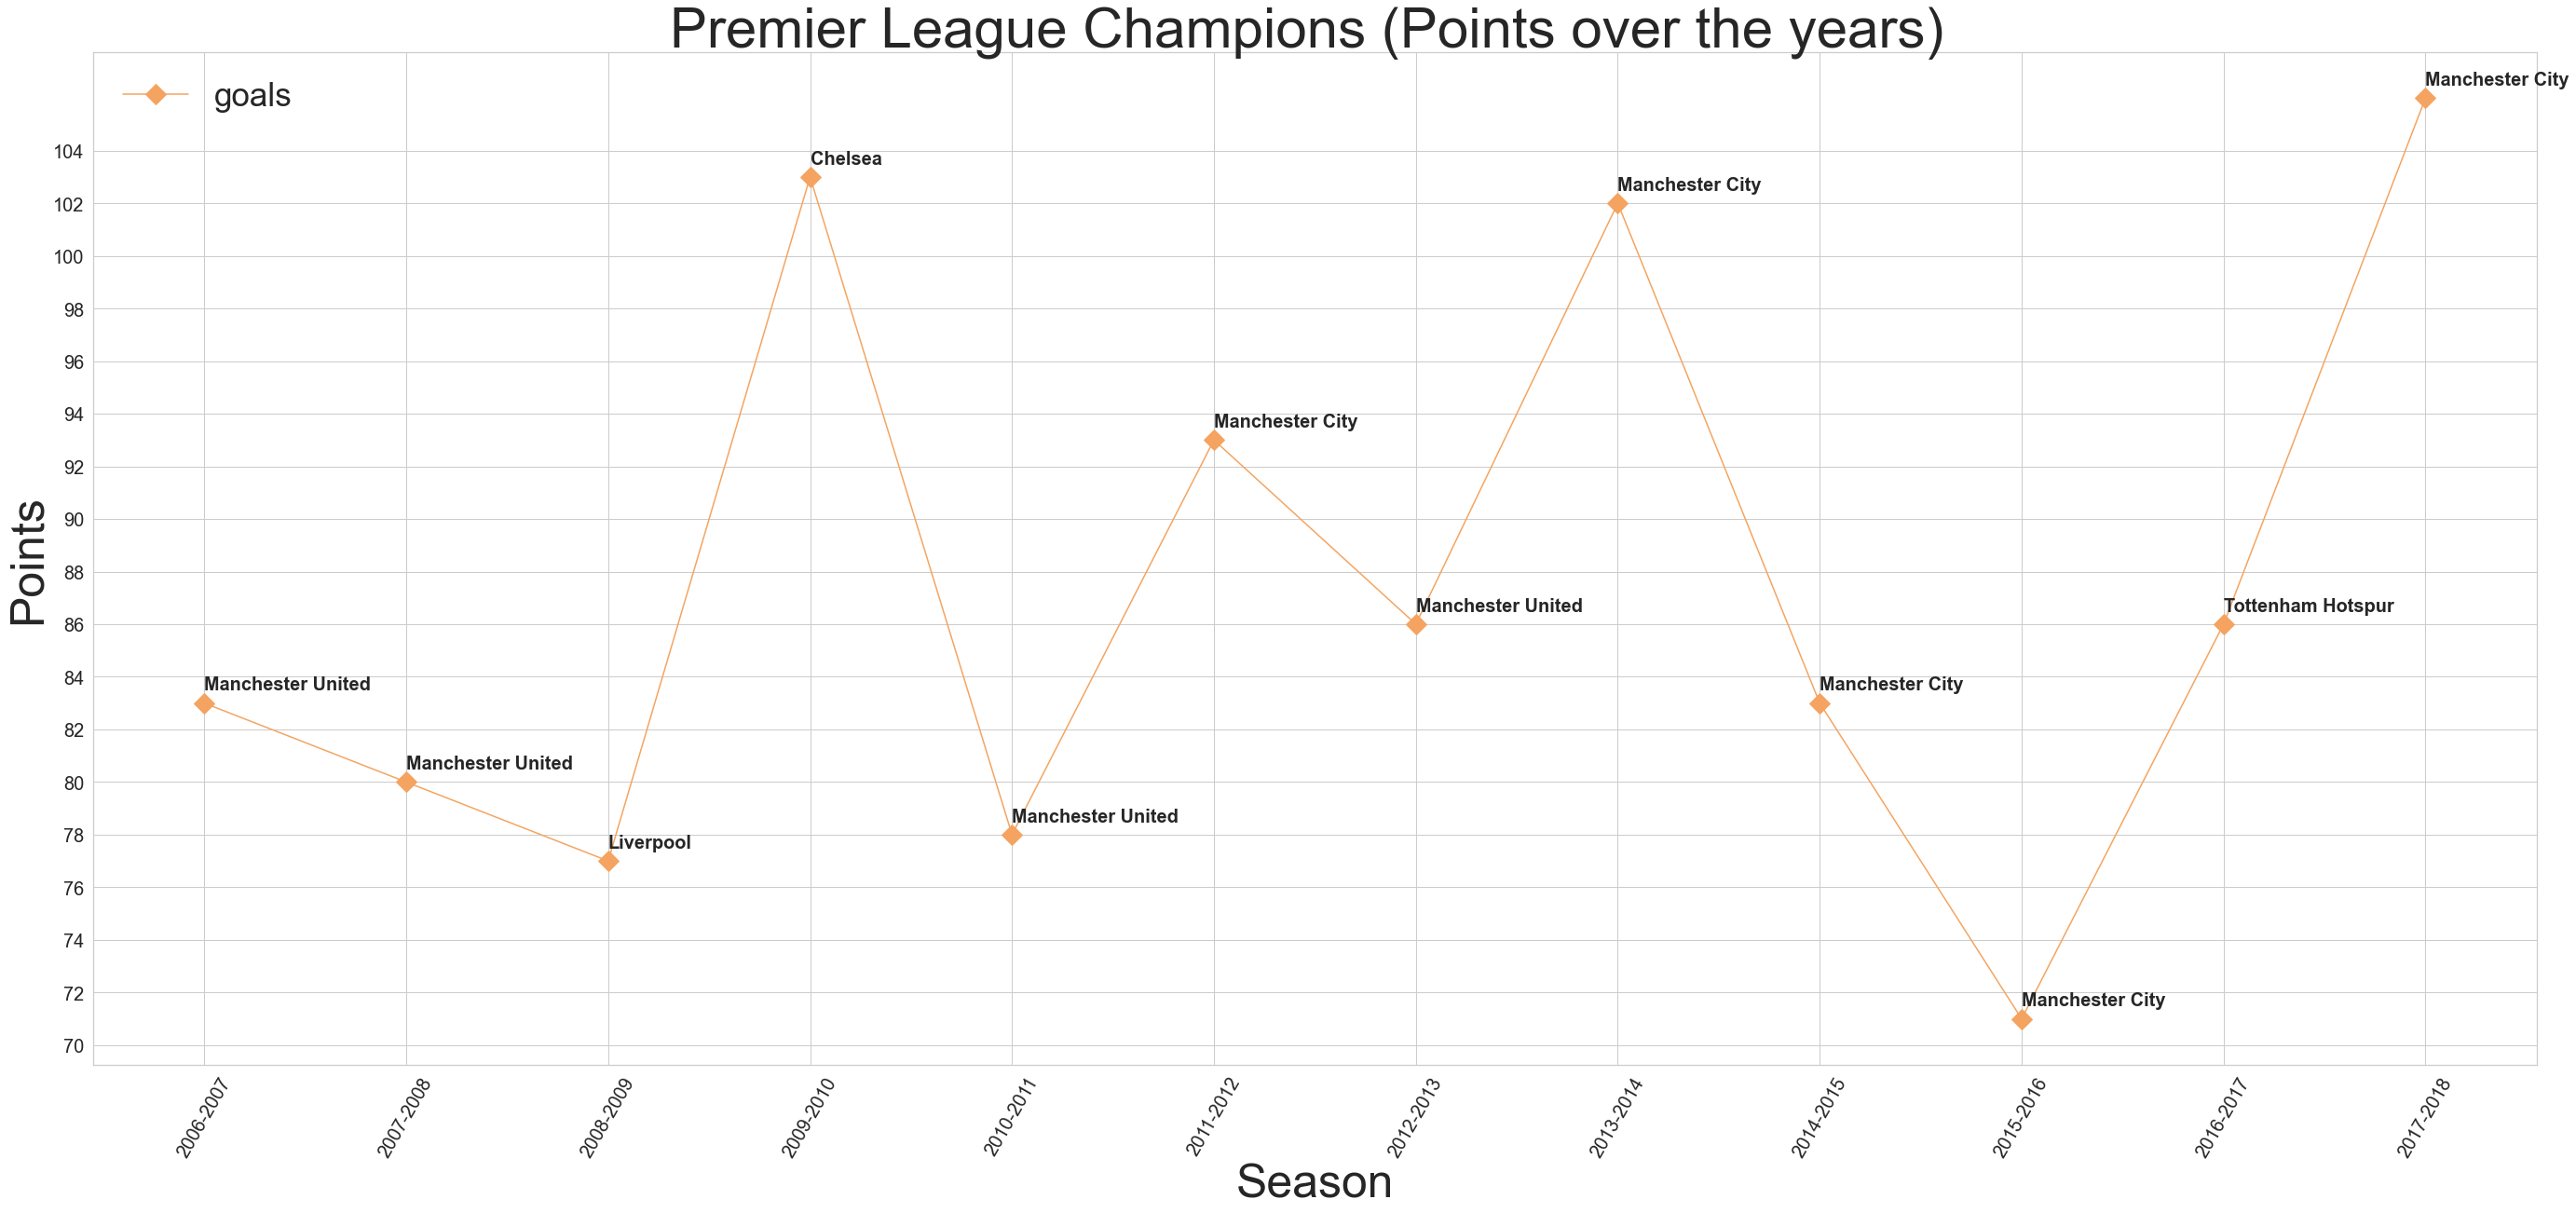

In [10]:
top = df[(df['rank']==1)]
top.set_index('season',drop=True,inplace=True)
top = top.reset_index()

ax = top.plot(kind='line',color='sandybrown',y='goals',grid=True,figsize=(47,20),label='goals',linestyle='-',marker='D',markevery=1,markersize=15, fillstyle='full',markerfacecolor='sandybrown')
plt.yticks(np.arange(70,105,2),fontsize=20)

a=0
for index,row in top.iterrows():
    b=row.goals
    plt.annotate(row.team,(a,b+.5),fontsize=20,fontweight='bold')
    a=a+1
    
plt.xlabel('Season',fontsize=50)
plt.ylabel('Points',fontsize=50)
plt.title('Premier League Champions (Points over the years) ',fontsize=60)
plt.legend(loc=2,fontsize=35)
plt.xticks(top.index,rotation=60,fontsize=20)
ax.set_xticklabels(top['season'])
plt.show()

<AxesSubplot:>

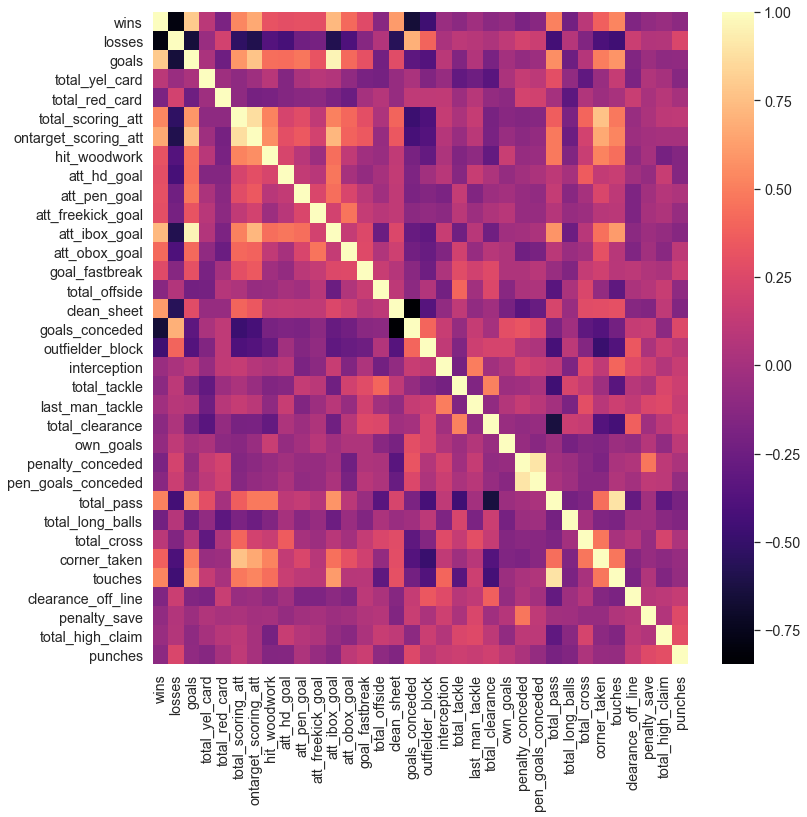

In [51]:
#히트맵 상관관계 확인
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='magma')

In [12]:
import re
team = []
for i in df.team: # 팀명에 보이지 않는 기호가 있어서 제거
    i = re.sub(r'\n', ' ', i)
    i = re.sub(r'\s+', '', i)
    team.append(i)
    
df['team1'] = team
team_name = df['team1'][:-7]
team_name.reset_index(drop='True')

0     Arsenal         
1     Chelsea         
2     Everton         
3     Liverpool       
4     ManchesterCity  
           ...        
72    Everton         
73    Liverpool       
74    ManchesterCity  
75    ManchesterUnited
76    TottenhamHotspur
Name: team1, Length: 77, dtype: object

In [13]:
# Y 변수 분리 및 불필요 컬럼 제거
y  = 105 - df['rank']*5
y = y[7:]
df = df.reset_index(drop='True')
df = df[:-7]
df.drop(columns=['team', 'team1', 'season', 'rank'], inplace=True)

In [14]:
y.shape

(77,)

In [15]:
header = df.columns
header

Index(['wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'outfielder_block', 'interception', 'total_tackle',
       'last_man_tackle', 'total_clearance', 'own_goals', 'penalty_conceded',
       'pen_goals_conceded', 'total_pass', 'total_long_balls', 'total_cross',
       'corner_taken', 'touches', 'clearance_off_line', 'penalty_save',
       'total_high_claim', 'punches'],
      dtype='object')

### 정규화

In [16]:
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df.join(team_name)

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,team1
0,-0.30,-0.12,-0.31,0.07,0.15,0.33,0.57,0.70,-0.02,2.46,0.71,-0.32,-0.04,0.92,1.03,-0.65,-0.46,-1.49,-2.35,2.05,-0.92,0.06,-0.61,-0.41,0.07,0.01,-0.50,-0.04,1.23,-0.53,-1.09,-0.95,1.97,0.32,Arsenal
1,0.77,-1.55,-0.23,0.40,0.78,0.30,0.23,-0.22,1.65,-0.74,2.78,-1.28,3.22,0.54,1.85,2.07,-1.74,-1.45,-1.82,1.89,-1.09,0.07,-0.61,-0.41,-0.52,-0.74,0.23,0.16,-0.35,-1.21,-0.68,0.31,1.18,-0.22,Chelsea
2,-1.15,0.46,-1.11,0.73,-0.47,-1.75,-1.91,-1.14,-0.30,1.54,0.02,-1.04,-0.54,-0.60,-0.51,-0.11,-0.35,0.43,-1.74,0.66,-0.92,0.64,1.16,0.06,-0.52,-2.70,0.29,-0.09,-1.12,-3.25,-0.68,0.31,1.69,-0.98,Everton
3,-0.08,0.46,-0.75,-1.57,-1.72,0.69,0.16,-0.03,-0.58,0.63,-0.67,-0.88,0.21,-0.60,1.49,1.52,-1.39,-1.81,-2.13,1.76,-0.76,-0.22,-1.49,-1.37,-1.11,-0.56,1.96,1.92,1.36,-1.15,-1.09,-0.95,-0.11,0.32,Liverpool
4,-2.01,2.75,-2.80,0.07,0.78,-1.88,-2.11,-1.88,-1.97,-1.20,-1.36,-2.71,-1.04,0.16,2.62,-0.11,0.58,0.02,-2.21,1.93,-0.92,0.09,0.28,-0.41,-0.52,-2.48,-0.46,-0.56,-1.45,-3.19,0.14,0.31,0.62,-0.76,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.73,0.74,-0.38,1.50,-0.47,-1.30,-0.62,-0.59,0.82,-0.74,0.02,0.16,-1.79,-0.98,-0.46,-0.38,0.58,1.61,-0.67,-0.82,-0.08,-0.21,-0.61,1.02,0.07,-0.37,2.51,-0.93,-1.52,-0.66,2.20,1.57,0.17,-0.55,Everton
73,0.34,-0.69,0.79,-0.47,-1.72,0.35,0.91,0.52,0.54,1.09,0.71,0.63,0.71,-0.60,-0.71,-0.65,0.35,-1.81,-1.02,-0.75,-0.76,-0.98,-1.49,0.54,0.07,1.69,1.20,-0.55,0.25,1.38,-1.50,1.57,-0.94,0.21,Liverpool
74,0.56,-0.69,0.94,1.39,0.78,0.27,0.23,0.89,-0.58,1.09,0.02,1.27,-0.79,0.54,-0.10,-0.65,0.00,-1.77,-0.38,-1.51,-1.09,-0.89,-0.61,0.54,-0.52,1.87,-0.66,-0.65,1.29,1.51,0.14,1.57,-1.50,-0.44,ManchesterCity
75,-0.51,-0.98,-0.97,2.16,-0.47,-0.24,0.03,0.70,-0.30,-0.74,-0.67,-0.80,-0.79,0.16,0.41,0.71,-1.16,-0.43,0.16,-1.04,-0.42,-0.23,-0.61,0.54,0.66,0.79,0.73,-0.25,-0.82,0.55,-1.09,0.31,-1.17,-2.17,ManchesterUnited


In [17]:
#더미 변수화
#scaled_df = pd.get_dummies(scaled_df, columns=['team1'], prefix = ['team1'])

In [18]:
scaled_df

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches
0,-0.30,-0.12,-0.31,0.07,0.15,0.33,0.57,0.70,-0.02,2.46,0.71,-0.32,-0.04,0.92,1.03,-0.65,-0.46,-1.49,-2.35,2.05,-0.92,0.06,-0.61,-0.41,0.07,0.01,-0.50,-0.04,1.23,-0.53,-1.09,-0.95,1.97,0.32
1,0.77,-1.55,-0.23,0.40,0.78,0.30,0.23,-0.22,1.65,-0.74,2.78,-1.28,3.22,0.54,1.85,2.07,-1.74,-1.45,-1.82,1.89,-1.09,0.07,-0.61,-0.41,-0.52,-0.74,0.23,0.16,-0.35,-1.21,-0.68,0.31,1.18,-0.22
2,-1.15,0.46,-1.11,0.73,-0.47,-1.75,-1.91,-1.14,-0.30,1.54,0.02,-1.04,-0.54,-0.60,-0.51,-0.11,-0.35,0.43,-1.74,0.66,-0.92,0.64,1.16,0.06,-0.52,-2.70,0.29,-0.09,-1.12,-3.25,-0.68,0.31,1.69,-0.98
3,-0.08,0.46,-0.75,-1.57,-1.72,0.69,0.16,-0.03,-0.58,0.63,-0.67,-0.88,0.21,-0.60,1.49,1.52,-1.39,-1.81,-2.13,1.76,-0.76,-0.22,-1.49,-1.37,-1.11,-0.56,1.96,1.92,1.36,-1.15,-1.09,-0.95,-0.11,0.32
4,-2.01,2.75,-2.80,0.07,0.78,-1.88,-2.11,-1.88,-1.97,-1.20,-1.36,-2.71,-1.04,0.16,2.62,-0.11,0.58,0.02,-2.21,1.93,-0.92,0.09,0.28,-0.41,-0.52,-2.48,-0.46,-0.56,-1.45,-3.19,0.14,0.31,0.62,-0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.73,0.74,-0.38,1.50,-0.47,-1.30,-0.62,-0.59,0.82,-0.74,0.02,0.16,-1.79,-0.98,-0.46,-0.38,0.58,1.61,-0.67,-0.82,-0.08,-0.21,-0.61,1.02,0.07,-0.37,2.51,-0.93,-1.52,-0.66,2.20,1.57,0.17,-0.55
73,0.34,-0.69,0.79,-0.47,-1.72,0.35,0.91,0.52,0.54,1.09,0.71,0.63,0.71,-0.60,-0.71,-0.65,0.35,-1.81,-1.02,-0.75,-0.76,-0.98,-1.49,0.54,0.07,1.69,1.20,-0.55,0.25,1.38,-1.50,1.57,-0.94,0.21
74,0.56,-0.69,0.94,1.39,0.78,0.27,0.23,0.89,-0.58,1.09,0.02,1.27,-0.79,0.54,-0.10,-0.65,0.00,-1.77,-0.38,-1.51,-1.09,-0.89,-0.61,0.54,-0.52,1.87,-0.66,-0.65,1.29,1.51,0.14,1.57,-1.50,-0.44
75,-0.51,-0.98,-0.97,2.16,-0.47,-0.24,0.03,0.70,-0.30,-0.74,-0.67,-0.80,-0.79,0.16,0.41,0.71,-1.16,-0.43,0.16,-1.04,-0.42,-0.23,-0.61,0.54,0.66,0.79,0.73,-0.25,-0.82,0.55,-1.09,0.31,-1.17,-2.17


In [19]:
#scaled_df4learn = scaled_df
#y4learn = y

In [20]:
#X_train, X_test, Y_train, Y_test = train_test_split(x, y4learn, test_size=0.3)

In [21]:
#print(X_train.shape)
#print(Y_train.shape)
#print(X_test.shape)
#print(Y_test.shape)

### LinearRegression 예측모델

In [36]:
lm = LinearRegression(fit_intercept=True)
lm.fit(scaled_df, y)
Y_pred = lm.predict(scaled_df)

In [39]:
Rsq = lm.score(scaled_df, y)
mse = metrics.mean_squared_error(y,Y_pred)
rmse = np.sqrt(mse)

In [25]:
lm.intercept_

82.92207792207792

In [40]:
print('R^2 = {}'.format(np.round(Rsq,2)))
print('MSE = {}'.format(np.round(mse,2)))
print('RMSE = {}'.format(np.round(rmse,2)))

R^2 = 0.64
MSE = 66.17
RMSE = 8.13


In [27]:
lm.coef_,2

(array([-4.3561, -2.6519,  1.8466,  1.3152, -0.3809,  0.6469, -1.4581,
        -1.0603, -1.6249, -0.0606, -0.5778,  1.607 ,  1.2735, -0.0514,
         0.4397, -0.9223, -5.1518,  3.2124, -2.5222,  3.1099,  1.7081,
         2.4051, -2.965 , 13.3758, -9.7804,  2.6961, -4.5093, -0.5021,
         3.8771,  4.3259, -2.5314, -6.1826, -3.0129,  4.2221]),
 2)

In [42]:
parametersDF = pd.DataFrame(lm.coef_.reshape(1,-1),index=['Parameter Value'], columns=header)
parametersDF['Intercept'] = lm.intercept_
parametersDF

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,Intercept
Parameter Value,-4.36,-2.65,1.85,1.32,-0.38,0.65,-1.46,-1.06,-1.62,-0.06,-0.58,1.61,1.27,-0.05,0.44,-0.92,-5.15,3.21,-2.52,3.11,1.71,2.41,-2.97,13.38,-9.78,2.70,-4.51,-0.50,3.88,4.33,-2.53,-6.18,-3.01,4.22,82.92


### Randomforest Regressor예측모델

In [29]:
n_estimators_grid = np.arange(1, 10)
depth_grid = np.arange(1,16)
min_samples_leaf_grid = np.arange(10,15)
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}
gridCV = GridSearchCV(RandomForestRegressor(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(scaled_df, y)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']

In [30]:
print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))

Random Forest best n_estimator : 6
Random Forest best max_depth : 8
Random Forest best min_samples_leaf : 10


In [45]:
RF_best = gridCV.best_estimator_                                    # 교차검증의 결과인 최적의 학습객체 사용.
Y_pred = RF_best.predict(scaled_df)
rf_Rsq = RF_best.score(scaled_df,y.values.reshape(-1,1))
rf_MSE = metrics.mean_squared_error(y, Y_pred)
rf_RMSE = np.sqrt(rf_MSE)

In [49]:
print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))
print('-'*40)
print('R^2 = {}'.format(rf_Rsq))
print('MSE = {}'.format(rf_MSE))
print('RMSE = {}'.format(rf_RMSE))

Random Forest best n_estimator : 6
Random Forest best max_depth : 8
Random Forest best min_samples_leaf : 10
----------------------------------------
R^2 = 0.5394184607173921
MSE = 83.84696988103943
RMSE = 9.156799106731535
